In [142]:
import pandas as pd 
import numpy as np
import matplotlib as plt 

df_1 = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')
df_2 = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [143]:
len(df1), len(df2)

(12000, 207917)

In [144]:
df_1.time_stamp = pd.to_datetime(df_1.time_stamp)
df_1.index = df_1.time_stamp
df_1.drop(labels='time_stamp',axis=1,inplace=True)

In [145]:
df_1.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [146]:
df_1_agg = df_1.resample("1440min").sum()

In [147]:
df_1_agg.head()

,user_id,visited
time_stamp,,
2012-05-31,25032,4
2012-06-01,48680,6
2012-06-02,61085,9
2012-06-03,60937,11
2012-06-04,59387,11


In [148]:
df_1_agg_1 = df_1_agg['visited']
df_1_agg_1.head()

time_stamp
2012-05-31     4
2012-06-01     6
2012-06-02     9
2012-06-03    11
2012-06-04    11
Freq: 1440T, Name: visited, dtype: int64

In [149]:
60*24*7

10080

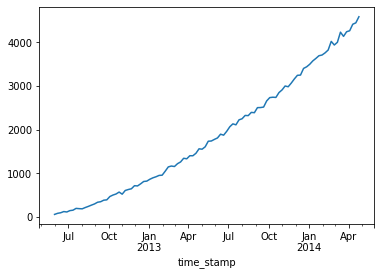

In [150]:
df_p = df_1_agg_1.resample('10080min').sum()
df_p[0:100].plot()

In [151]:
df_grp = df_1.groupby([pd.Grouper(freq = 'W'), 'user_id']).sum()
df_grp.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

In [152]:
# join both tables 
df_users_join = df_2.merge(df_grp, how = 'inner', left_on = 'object_id', right_on = 'user_id')

In [153]:
df_users_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1


In [154]:
df_users_join.dropna()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
